<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.784881  63.121425  72.281135  ...  193.174784  193.180224 -0.005440
      1.0    61.876363  96.821973  41.964002  ...  210.674483  210.659657  0.014827
      2.0    73.261895  26.630607  46.865109  ...  156.719666  156.745823 -0.026157
      3.0    74.531621  22.442050  32.145912  ...  139.157430  139.103692  0.053737
      4.0    48.209026  43.935820  73.197938  ...  175.330297  175.331983 -0.001686
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   33.274955  46.577811  42.991800  ...  132.844910  132.851685 -0.006775
      16.0   36.647611  92.356779  33.415651  ...  172.425390  172.436087 -0.010697
      17.0   92.972778  44.933858  58.791392  ...  206.685326  206.680713  0.004613
      18.0   84.997084  75.850012  28.226109  ...  199.056892  199.068423 -0.011531
      19.0   31.192842  49.205503  30.569650  ...  120.977925  120.977792  0.000134

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.784881  63.121425  72.281135  ...  193.174784  193.180224 -0.005440
      1.0    61.876363  96.821973  41.964002  ...  210.674483  210.659657  0.014827
      2.0    73.261895  26.630607  46.865109  ...  156.719666  156.745823 -0.026157
      3.0    74.531621  22.442050  32.145912  ...  139.157430  139.103692  0.053737
      4.0    48.209026  43.935820  73.197938  ...  175.330297  175.331983 -0.001686
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   33.274955  46.577811  42.991800  ...  132.844910  132.851685 -0.006775
      16.0   36.647611  92.356779  33.415651  ...  172.425390  172.436087 -0.010697
      17.0   92.972778  44.933858  58.791392  ...  206.685326  206.680713  0.004613
      18.0   84.997084  75.850012  28.226109  ...  199.056892  199.068423 -0.011531
      19.0   31.192842  49.205503  30.569650  ...  120.977925  120.977792  0.000134

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.784881  63.121425  72.281135  ...  193.174784  193.180224 -0.005440
      1.0    61.876363  96.821973  41.964002  ...  210.674483  210.659657  0.014827
      2.0    73.261895  26.630607  46.865109  ...  156.719666  156.745823 -0.026157
      3.0    74.531621  22.442050  32.145912  ...  139.157430  139.103692  0.053737
      4.0    48.209026  43.935820  73.197938  ...  175.330297  175.331983 -0.001686
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   33.274955  46.577811  42.991800  ...  132.844910  132.851685 -0.006775
      16.0   36.647611  92.356779  33.415651  ...  172.425390  172.436087 -0.010697
      17.0   92.972778  44.933858  58.791392  ...  206.685326  206.680713  0.004613
      18.0   84.997084  75.850012  28.226109  ...  199.056892  199.068423 -0.011531
      19.0   31.192842  49.205503  30.569650  ...  120.977925  120.977792  0.000134

[20000 rows x 7 columns]

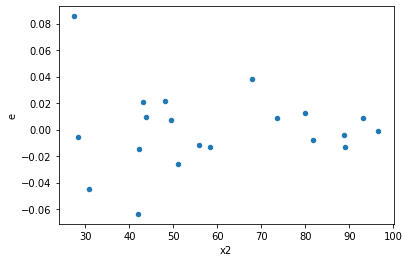

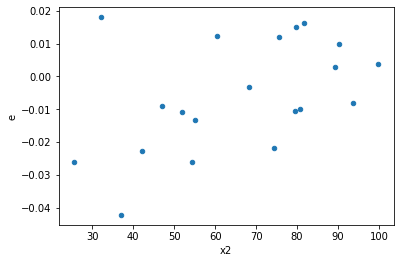

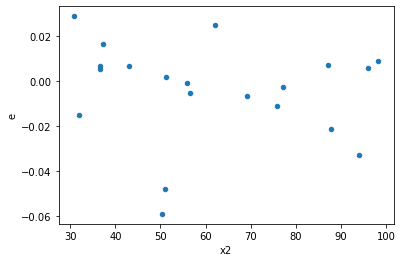

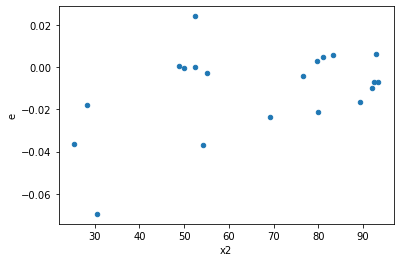

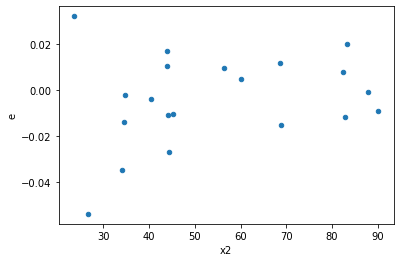

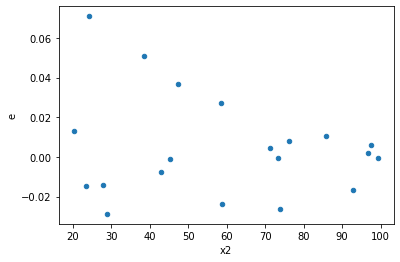

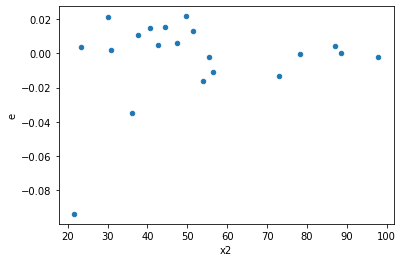

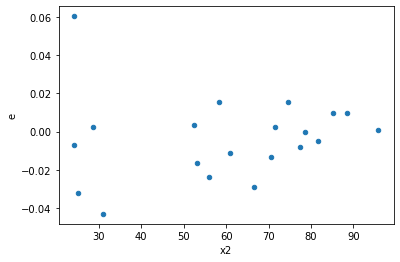

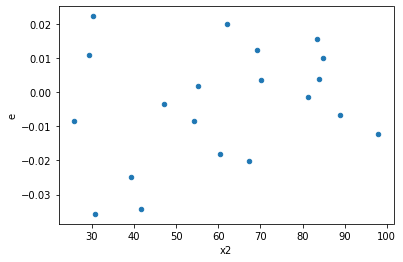

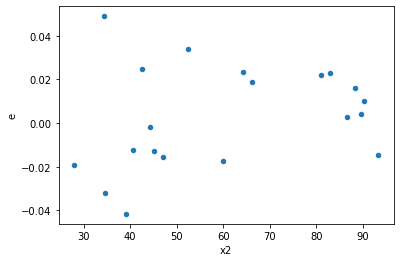

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
23.0,5.0,5.0,0.00077002154816764,0.002096608391436136,0.000154004309633528,0.00041932167828722717,2.7227918444948336,0.29572569454359,0.852137152728205,0.147862847271795,Reject005=1 : Homoscedasticity
54.0,5.0,5.0,0.0006289120801862146,0.0008655485384329357,0.00012578241603724291,0.00017310970768658713,1.3762631784345045,0.7345467559815271,0.6327266220092365,0.36727337799076354,Reject005=1 : Homoscedasticity
72.0,5.0,5.0,0.00023077185248425547,0.000410327227543652,4.615437049685109e-05,8.206544550873039e-05,1.7780644525165683,0.542957859652613,0.7285210701736935,0.2714789298263065,Reject005=1 : Homoscedasticity
74.0,5.0,5.0,0.00020570851054242578,0.0005625314543643249,4.114170210848515e-05,0.00011250629087286499,2.7346046737736076,0.29371904367905843,0.8531404781604708,0.14685952183952922,Reject005=1 : Homoscedasticity
76.0,5.0,5.0,0.00016674750879175042,0.0012481745815073216,3.334950175835009e-05,0.0002496349163014643,7.485416667100894,0.04541343707964485,0.9772932814601776,0.022706718539822424,Reject005=0 : Heteroscedasticity
81.0,5.0,5.0,0.00014169579470765272,0.00031843448557259134,2.8339158941530545e-05,6.368689711451827e-05,2.247310770440199,0.39494061622280485,0.8025296918885976,0.19747030811140243,Reject005=1 : Homoscedasticity
91.0,5.0,5.0,0.00039918583002812987,0.0004003935091353009,7.983716600562597e-05,8.007870182706017e-05,1.0030253556522433,0.9974358799811203,0.5012820600094399,0.49871793999056013,Reject005=1 : Homoscedasticity
105.0,5.0,5.0,0.0004752106029689763,0.0009597684160899329,9.504212059379526e-05,0.00019195368321798658,2.019669616152463,0.4588595400230919,0.770570229988454,0.22942977001154596,Reject005=1 : Homoscedasticity
130.0,5.0,5.0,0.0005195514875833483,0.0015462374882173461,0.00010391029751666967,0.0003092474976434692,2.9761005890090786,0.2564938504146741,0.871753074792663,0.12824692520733705,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.007589930352925892,0.0009385788421096561,0.0015179860705851784,0.00018771576842193123,0.12366106123066561,0.038618398121294396,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.0015374198553447867,0.0006831113574397384,0.00030748397106895734,0.0001366222714879477,0.44432323094106374,0.3941047576413149,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.0024592109128461887,0.00014713213595262314,0.0004918421825692378,2.942642719052463e-05,0.05982900254063142,0.0077344990826436035,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.0011569529417397215,0.00021492456603129949,0.0002313905883479443,4.29849132062599e-05,0.18576776831399497,0.08838424196764186,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,0.001852210907145608,0.0004674740079264332,0.0003704421814291216,9.349480158528664e-05,0.2523870289949025,0.15703929322035504,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.011773494634519587,0.0003738436514032735,0.0023546989269039175,7.47687302806547e-05,0.031752989491087326,0.0017461363687730311,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,0.002416346715061868,0.00046283280957201223,0.0004832693430123736,9.256656191440244e-05,0.19154238366829815,0.09380051513803267,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.0014271992858325769,0.0003706031497806066,0.00028543985716651535,7.412062995612131e-05,0.25967161941537126,0.16523892033309637,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.0011433617295674126,0.0006145192159368478,0.00022867234591348253,0.00012290384318736956,0.5374670150708554,0.5120709441046234,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      589
Reject005=0 : Heteroscedasticity    411
Name: Result_test, dtype: int64